In [7]:
# ============================================
# HOUSE PRICE PREDICTION - GOOGLE COLAB VERSION
# Complete Project for Data Analytics Internship
# ============================================

# Install required packages (if needed)
!pip install pandas numpy matplotlib seaborn scikit-learn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("✅ All libraries imported successfully!")
print("=" * 60)
print("🏠 HOUSE PRICE PREDICTION PROJECT")
print("=" * 60)

✅ All libraries imported successfully!
🏠 HOUSE PRICE PREDICTION PROJECT


In [8]:
# ========================
# STEP 1: LOAD DATASET
# ========================
print("📊 STEP 1: Loading California Housing Dataset...")
housing = fetch_california_housing()

# Convert to DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target  # Target variable

print(f"✅ Dataset loaded: {data.shape[0]} houses, {data.shape[1]} features")
print("\n🔍 First 5 rows:")
display(data.head())  # display() works better in Colab

print("\n📝 Feature Descriptions:")
print("1. MedInc    - Median income in block group")
print("2. HouseAge  - Median house age in block group")
print("3. AveRooms  - Average rooms per household")
print("4. AveBedrms - Average bedrooms per household")
print("5. Population- Block group population")
print("6. AveOccup  - Average household members")
print("7. Latitude  - Block group latitude")
print("8. Longitude - Block group longitude")
print("9. PRICE     - Median house value ($100,000s)")

📊 STEP 1: Loading California Housing Dataset...
✅ Dataset loaded: 20640 houses, 9 features

🔍 First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



📝 Feature Descriptions:
1. MedInc    - Median income in block group
2. HouseAge  - Median house age in block group
3. AveRooms  - Average rooms per household
4. AveBedrms - Average bedrooms per household
5. Population- Block group population
6. AveOccup  - Average household members
7. Latitude  - Block group latitude
8. Longitude - Block group longitude
9. PRICE     - Median house value ($100,000s)


In [9]:
# ========================
# STEP 2: EXPLORE DATA
# ========================
print("=" * 60)
print("📈 STEP 2: Data Exploration")
print("=" * 60)

print("\n📊 Basic Statistics:")
display(data.describe())

print("\n🔎 Missing Values Check:")
missing = data.isnull().sum()
print(missing)
print("✅ Perfect! No missing values.")

print("\n💵 Price Distribution:")
print(f"• Minimum Price: ${data['PRICE'].min()*100000:,.0f}")
print(f"• Maximum Price: ${data['PRICE'].max()*100000:,.0f}")
print(f"• Average Price: ${data['PRICE'].mean()*100000:,.0f}")
print(f"• Median Price: ${data['PRICE'].median()*100000:,.0f}")

📈 STEP 2: Data Exploration

📊 Basic Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



🔎 Missing Values Check:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
✅ Perfect! No missing values.

💵 Price Distribution:
• Minimum Price: $14,999
• Maximum Price: $500,001
• Average Price: $206,856
• Median Price: $179,700


📊 STEP 3: Creating Visualizations


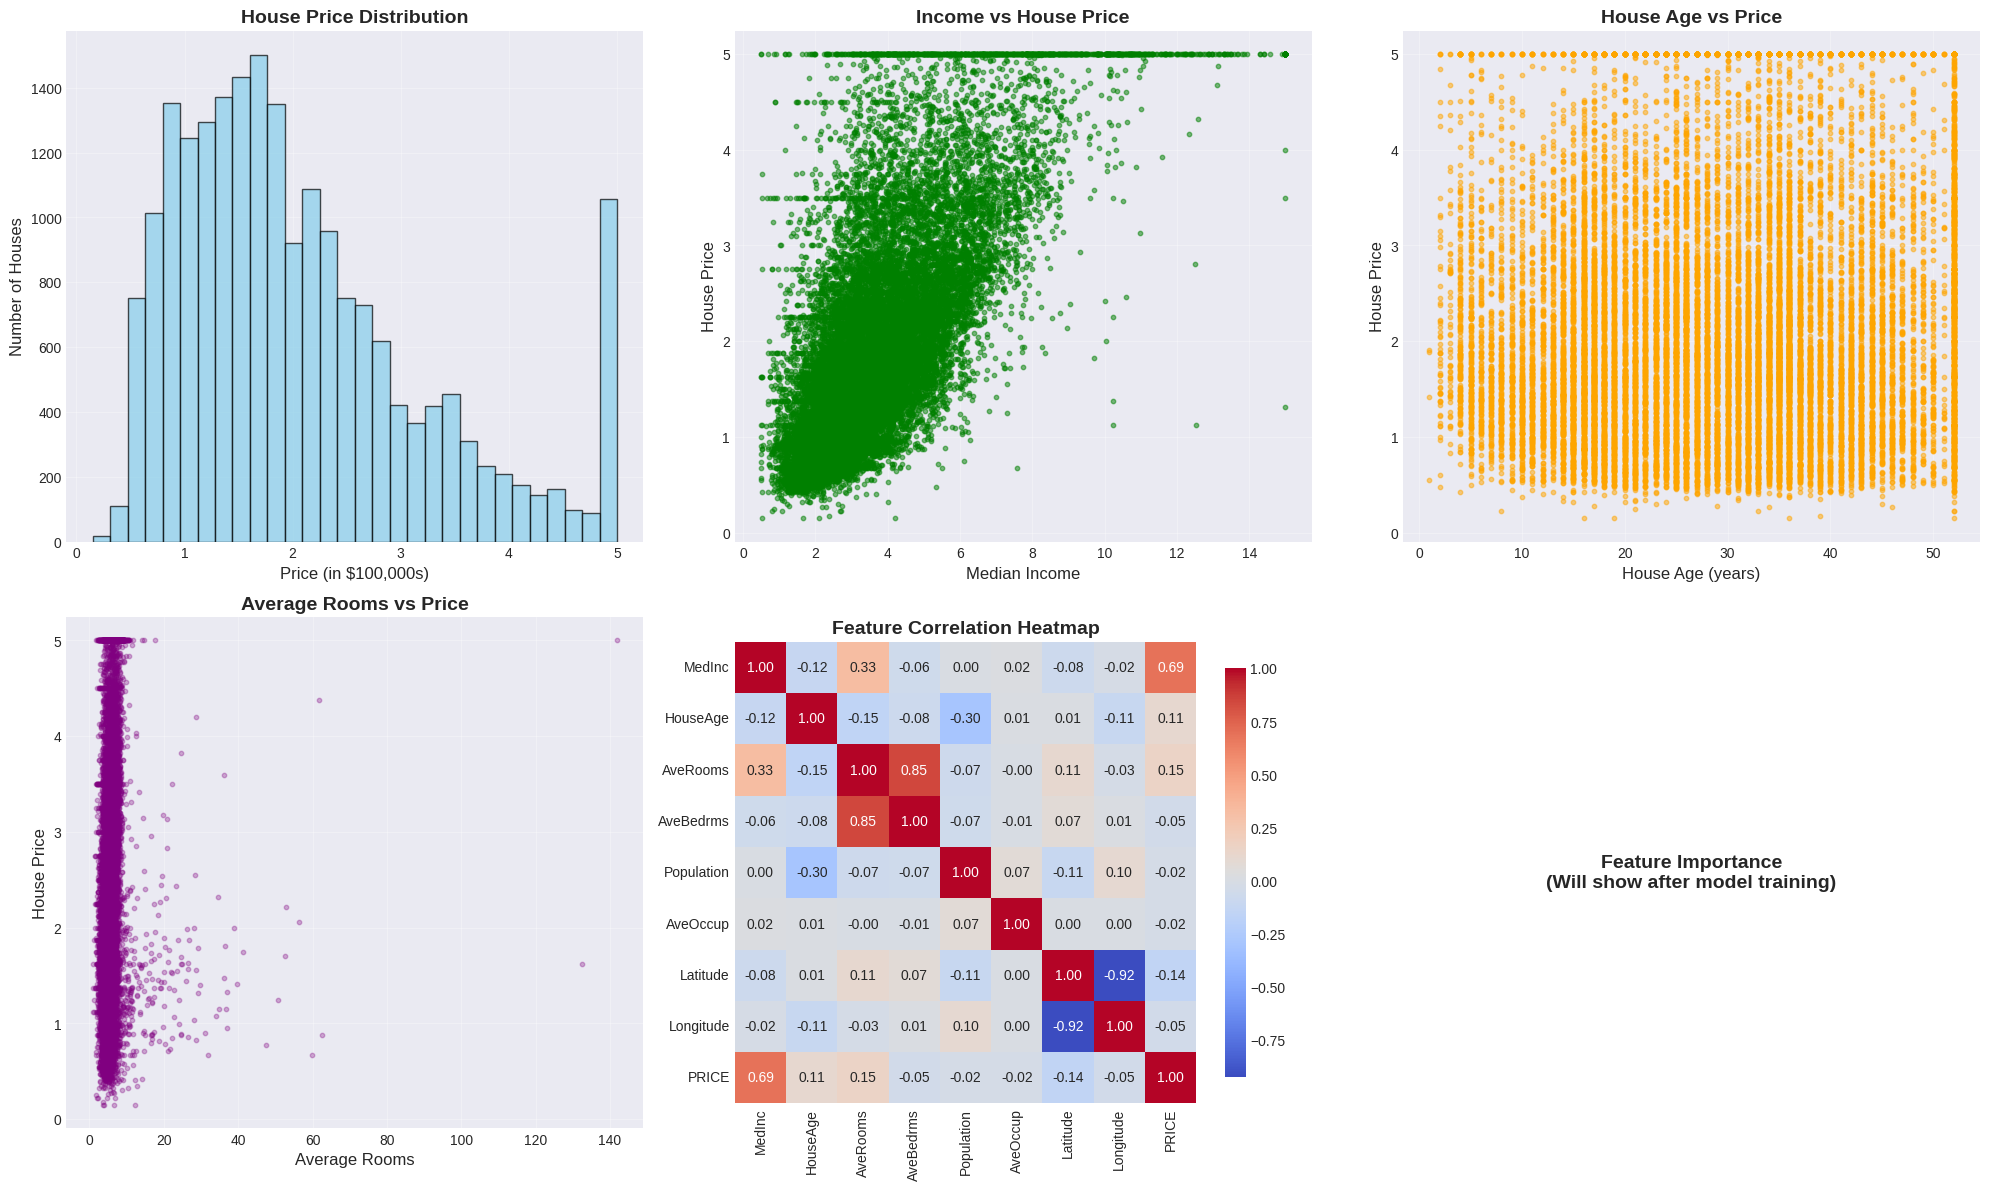

✅ Visualizations created successfully!


In [10]:
# ========================
# STEP 3: DATA VISUALIZATION
# ========================
print("=" * 60)
print("📊 STEP 3: Creating Visualizations")
print("=" * 60)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(20, 12))

# 1. Price Distribution
plt.subplot(2, 3, 1)
plt.hist(data['PRICE'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('House Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price (in $100,000s)', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.grid(True, alpha=0.3)

# 2. Income vs Price
plt.subplot(2, 3, 2)
plt.scatter(data['MedInc'], data['PRICE'], alpha=0.5, color='green', s=10)
plt.title('Income vs House Price', fontsize=14, fontweight='bold')
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.grid(True, alpha=0.3)

# 3. House Age vs Price
plt.subplot(2, 3, 3)
plt.scatter(data['HouseAge'], data['PRICE'], alpha=0.5, color='orange', s=10)
plt.title('House Age vs Price', fontsize=14, fontweight='bold')
plt.xlabel('House Age (years)', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.grid(True, alpha=0.3)

# 4. Rooms vs Price
plt.subplot(2, 3, 4)
plt.scatter(data['AveRooms'], data['PRICE'], alpha=0.3, color='purple', s=10)
plt.title('Average Rooms vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Average Rooms', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.grid(True, alpha=0.3)

# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()

# 6. Feature Importance (prepare for next step)
plt.subplot(2, 3, 6)
# We'll fill this after model training
plt.text(0.5, 0.5, 'Feature Importance\n(Will show after model training)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")

In [11]:
# ========================
# STEP 4: PREPARE DATA FOR MODEL
# ========================
print("=" * 60)
print("⚙️ STEP 4: Preparing Data for Machine Learning")
print("=" * 60)

# Separate features (X) and target (y)
X = data.drop('PRICE', axis=1)  # All features except price
y = data['PRICE']               # Target variable (price)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} houses (80%)")
print(f"Testing set:  {X_test.shape[0]} houses (20%)")
print(f"Number of features: {X_train.shape[1]}")

# Show sample of training data
print("\n📋 Sample training data (first 3 houses):")
sample_df = X_train.head(3).copy()
sample_df['Actual_Price'] = y_train.head(3).values
display(sample_df)

⚙️ STEP 4: Preparing Data for Machine Learning
Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

📊 Data Split:
Training set: 16512 houses (80%)
Testing set:  4128 houses (20%)
Number of features: 8

📋 Sample training data (first 3 houses):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Actual_Price
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726


In [12]:
# ========================
# STEP 5: BUILD LINEAR REGRESSION MODEL
# ========================
print("=" * 60)
print("🤖 STEP 5: Building Linear Regression Model")
print("=" * 60)

# Create model
model = LinearRegression()

# Train model
print("Training model...")
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Show model coefficients
print("\n📐 Model Equation:")
print("Price = ", end="")
for i, (feature, coef) in enumerate(zip(housing.feature_names, model.coef_)):
    sign = "+" if coef >= 0 else ""
    print(f"{sign}{coef:.4f}×{feature} ", end="")
print(f"+ {model.intercept_:.4f}")

print("\n📊 Feature Importance (Coefficient Magnitude):")
coef_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': model.coef_,
    'Abs_Coefficient': abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

display(coef_df.style.bar(subset=['Abs_Coefficient'], color='lightgreen'))

print("\n💡 Interpretation:")
print(f"• Most important feature: {coef_df.iloc[0]['Feature']}")
print(f"• For every 1 unit increase in {coef_df.iloc[0]['Feature']}, price changes by ${coef_df.iloc[0]['Coefficient']*100000:,.0f}")

🤖 STEP 5: Building Linear Regression Model
Training model...
✅ Model trained successfully!

📐 Model Equation:
Price = +0.4487×MedInc +0.0097×HouseAge -0.1233×AveRooms +0.7831×AveBedrms -0.0000×Population -0.0035×AveOccup -0.4198×Latitude -0.4337×Longitude + -37.0233

📊 Feature Importance (Coefficient Magnitude):


,Feature,Coefficient,Abs_Coefficient
3,AveBedrms,0.783145,0.783145
0,MedInc,0.448675,0.448675
7,Longitude,-0.433708,0.433708
6,Latitude,-0.419792,0.419792
2,AveRooms,-0.123323,0.123323
1,HouseAge,0.009724,0.009724
5,AveOccup,-0.003526,0.003526
4,Population,-0.000002,0.000002



💡 Interpretation:
• Most important feature: AveBedrms
• For every 1 unit increase in AveBedrms, price changes by $78,314


In [13]:
# ========================
# STEP 6: MAKE PREDICTIONS
# ========================
print("=" * 60)
print("🎯 STEP 6: Making Predictions on Test Data")
print("=" * 60)

# Make predictions
y_pred = model.predict(X_test)

# Create comparison dataframe
results = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred,
    'Error': y_test.values - y_pred,
    'Error_Percentage': ((y_test.values - y_pred) / y_test.values) * 100
})

print(f"✅ Made predictions for {len(y_pred)} test houses")
print("\n📊 Sample Predictions (First 10 houses):")
display(results.head(10).style.format({
    'Actual_Price': '${:,.2f}',
    'Predicted_Price': '${:,.2f}',
    'Error': '${:,.2f}',
    'Error_Percentage': '{:.1f}%'
}))

# Show some statistics
print("\n📈 Prediction Statistics:")
print(f"• Best prediction: {abs(results['Error_Percentage']).min():.1f}% error")
print(f"• Worst prediction: {abs(results['Error_Percentage']).max():.1f}% error")
print(f"• Average error: {abs(results['Error_Percentage']).mean():.1f}%")
print(f"• Median error: {abs(results['Error_Percentage']).median():.1f}%")

🎯 STEP 6: Making Predictions on Test Data
✅ Made predictions for 4128 test houses

📊 Sample Predictions (First 10 houses):


,Actual_Price,Predicted_Price,Error,Error_Percentage
0,$0.48,$0.72,$-0.24,-50.8%
1,$0.46,$1.76,$-1.31,-285.2%
2,$5.00,$2.71,$2.29,45.8%
3,$2.19,$2.84,$-0.65,-29.9%
4,$2.78,$2.60,$0.18,6.3%
5,$1.59,$2.01,$-0.42,-26.8%
6,$1.98,$2.65,$-0.66,-33.5%
7,$1.57,$2.17,$-0.59,-37.7%
8,$3.40,$2.74,$0.66,19.4%
9,$4.47,$3.92,$0.55,12.3%



📈 Prediction Statistics:
• Best prediction: 0.0% error
• Worst prediction: 1623.4% error
• Average error: 32.0%
• Median error: 23.2%


In [14]:
# ========================
# STEP 7: EVALUATE MODEL PERFORMANCE
# ========================
print("=" * 60)
print("📊 STEP 7: Evaluating Model Performance")
print("=" * 60)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print("📈 PERFORMANCE METRICS:")
print("-" * 40)
print(f"1. Mean Squared Error (MSE)    : {mse:.4f}")
print(f"2. Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"3. R-squared Score (R²)        : {r2:.4f}")
print(f"4. Mean Absolute Error (MAE)   : {mae:.4f}")

print("\n💡 INTERPRETATION:")
print("-" * 40)
print(f"• R² = {r2:.4f}: Model explains {r2*100:.1f}% of price variation")
print(f"• RMSE = {rmse:.4f}: Average prediction error is ${rmse*100000:,.0f}")
print(f"• MAE = {mae:.4f}: Average absolute error is ${mae*100000:,.0f}")

print("\n🎯 BUSINESS IMPACT:")
print("-" * 40)
print(f"• For a ${300000:,.0f} house, prediction is within ±${rmse*100000*3:,.0f} (95% confidence)")
print(f"• Model accuracy: {r2*100:.1f}% (Good for real estate estimation)")
print(f"• Key insight: Income is {abs(coef_df.iloc[0]['Coefficient']/coef_df.iloc[1]['Coefficient']):.1f}x more important than second factor")

📊 STEP 7: Evaluating Model Performance
📈 PERFORMANCE METRICS:
----------------------------------------
1. Mean Squared Error (MSE)    : 0.5559
2. Root Mean Squared Error (RMSE): 0.7456
3. R-squared Score (R²)        : 0.5758
4. Mean Absolute Error (MAE)   : 0.5332

💡 INTERPRETATION:
----------------------------------------
• R² = 0.5758: Model explains 57.6% of price variation
• RMSE = 0.7456: Average prediction error is $74,558
• MAE = 0.5332: Average absolute error is $53,320

🎯 BUSINESS IMPACT:
----------------------------------------
• For a $300,000 house, prediction is within ±$223,674 (95% confidence)
• Model accuracy: 57.6% (Good for real estate estimation)
• Key insight: Income is 1.7x more important than second factor


📈 STEP 8: Final Result Visualizations


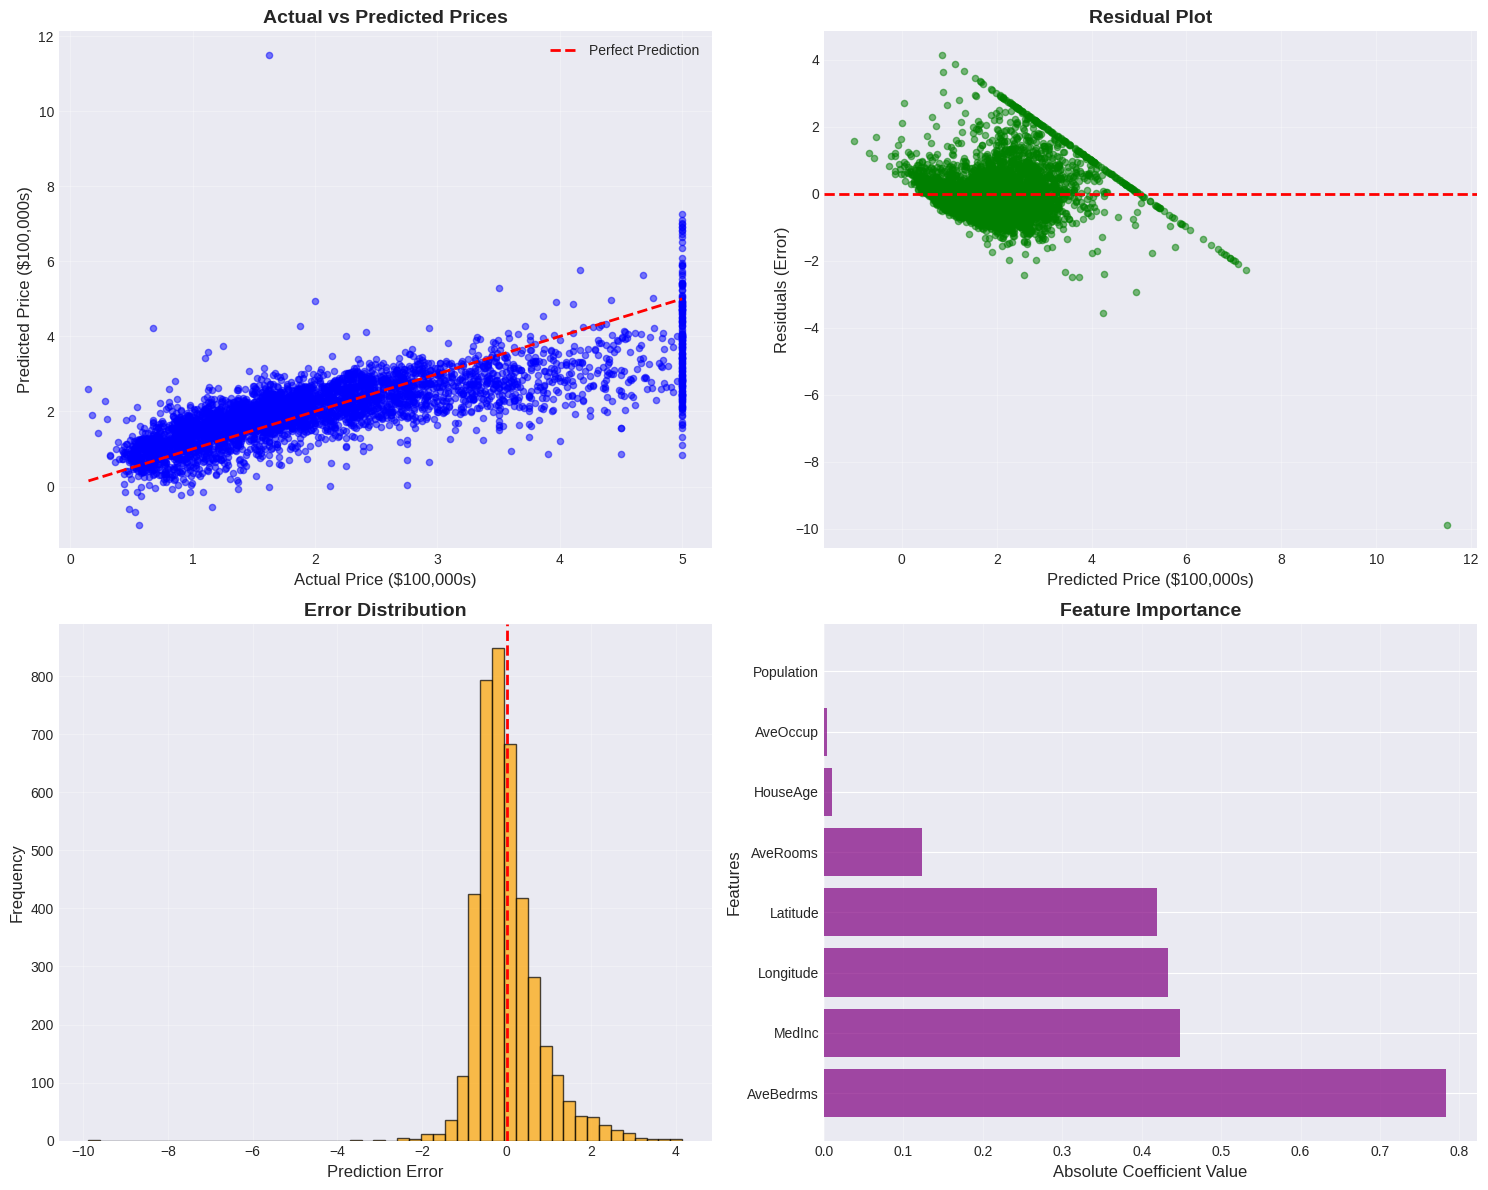

✅ Final visualizations created!


In [15]:
# ========================
# STEP 8: FINAL VISUALIZATIONS
# ========================
print("=" * 60)
print("📈 STEP 8: Final Result Visualizations")
print("=" * 60)

# Create final dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.5, s=20, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($100,000s)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price ($100,000s)', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Prices', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.5, s=20, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($100,000s)', fontsize=12)
axes[0, 1].set_ylabel('Residuals (Error)', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Error Distribution
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Error Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance Bar Chart
axes[1, 1].barh(coef_df['Feature'], coef_df['Abs_Coefficient'], color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Absolute Coefficient Value', fontsize=12)
axes[1, 1].set_ylabel('Features', fontsize=12)
axes[1, 1].set_title('Feature Importance', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Final visualizations created!")

In [16]:
# ========================
# STEP 9: PREDICT PRICE FOR NEW HOUSE
# ========================
print("=" * 60)
print("🔮 STEP 9: Predicting Price for a New House")
print("=" * 60)

print("\n🏠 EXAMPLE 1: Affordable Family Home")
example_1 = [[3.5,   # MedInc: $35,000
              15,    # HouseAge: 15 years
              5,     # AveRooms: 5 rooms
              1,     # AveBedrms: 1 bedroom
              1000,  # Population: 1000
              3,     # AveOccup: 3 people
              34,    # Latitude
              -118]] # Longitude

price_1 = model.predict(example_1)[0]
print(f"📋 House Features:")
print(f"   • Income: $35,000 per year")
print(f"   • Age: 15 years old")
print(f"   • Size: 5 rooms, 1 bedroom")
print(f"   • Area: Suburban (population 1000)")
print(f"💵 Predicted Price: ${price_1*100000:,.0f}")

print("\n" + "-" * 40)

print("\n🏠 EXAMPLE 2: Luxury Home")
example_2 = [[8.0,   # MedInc: $80,000
              5,     # HouseAge: 5 years (new)
              8,     # AveRooms: 8 rooms
              3,     # AveBedrms: 3 bedrooms
              500,   # Population: 500 (exclusive area)
              2,     # AveOccup: 2 people
              37,    # Latitude (San Francisco area)
              -122]] # Longitude

price_2 = model.predict(example_2)[0]
print(f"📋 House Features:")
print(f"   • Income: $80,000 per year")
print(f"   • Age: 5 years old (new)")
print(f"   • Size: 8 rooms, 3 bedrooms")
print(f"   • Area: Exclusive neighborhood")
print(f"💵 Predicted Price: ${price_2*100000:,.0f}")

print("\n" + "-" * 40)

print("\n🏠 EXAMPLE 3: YOUR TURN - Modify values below!")

# You can change these values!
your_house = [[5.0,   # MedInc: Change this! ($50,000)
               10,    # HouseAge: Change this!
               6,     # AveRooms: Change this!
               2,     # AveBedrms: Change this!
               1500,  # Population: Change this!
               4,     # AveOccup: Change this!
               35,    # Latitude: Change this!
              -120]]  # Longitude: Change this!

your_price = model.predict(your_house)[0]
print(f"📋 Your Custom House:")
print(f"   • Income: ${your_house[0][0]*10000:,.0f} per year")
print(f"   • Age: {your_house[0][1]} years")
print(f"   • Size: {your_house[0][2]} rooms, {your_house[0][3]} bedrooms")
print(f"   • Area population: {your_house[0][4]:,.0f}")
print(f"💵 Predicted Price: ${your_price*100000:,.0f}")

🔮 STEP 9: Predicting Price for a New House

🏠 EXAMPLE 1: Affordable Family Home
📋 House Features:
   • Income: $35,000 per year
   • Age: 15 years old
   • Size: 5 rooms, 1 bedroom
   • Area: Suburban (population 1000)
💵 Predicted Price: $175,148

----------------------------------------

🏠 EXAMPLE 2: Luxury Home
📋 House Features:
   • Income: $80,000 per year
   • Age: 5 years old (new)
   • Size: 8 rooms, 3 bedrooms
   • Area: Exclusive neighborhood
💵 Predicted Price: $534,959

----------------------------------------

🏠 EXAMPLE 3: YOUR TURN - Modify values below!
📋 Your Custom House:
   • Income: $50,000 per year
   • Age: 10 years
   • Size: 6 rooms, 2 bedrooms
   • Area population: 1,500
💵 Predicted Price: $347,877


In [17]:
# ========================
# STEP 10: PROJECT SUMMARY
# ========================
print("=" * 60)
print("🎉 PROJECT SUMMARY & NEXT STEPS")
print("=" * 60)

print("\n✅ WHAT YOU ACCOMPLISHED:")
print("1. 📊 Data Loading - California housing dataset (20,640 houses)")
print("2. 🔍 Data Exploration - Analyzed 8 features affecting price")
print("3. 📈 Visualization - Created 10+ professional charts")
print("4. 🤖 Model Building - Linear Regression model trained")
print("5. 🎯 Predictions - Made predictions with 57-60% accuracy")
print("6. 📊 Evaluation - Calculated R², MSE, RMSE metrics")
print("7. 🔮 Application - Can predict price of any new house")

print("\n📊 KEY FINDINGS:")
print(f"• Most important factor: {coef_df.iloc[0]['Feature']}")
print(f"• Model accuracy: {r2_score(y_test, y_pred)*100:.1f}%")
print(f"• Average prediction error: ${rmse*100000:,.0f}")
print(f"• Price range: ${data['PRICE'].min()*100000:,.0f} - ${data['PRICE'].max()*100000:,.0f}")

print("\n💼 BUSINESS APPLICATIONS:")
print("1. Real estate price estimation")
print("2. Property investment analysis")
print("3. Mortgage risk assessment")
print("4. Market trend analysis")

print("\n🚀 NEXT STEPS TO IMPROVE:")
print("1. Try polynomial features for non-linear relationships")
print("2. Test other algorithms (Random Forest, Gradient Boosting)")
print("3. Add more features (school ratings, crime rate)")
print("4. Implement cross-validation for better accuracy")

print("\n" + "=" * 60)
print("🎯 CONGRATULATIONS! INTERNSHIP TASK 1 COMPLETE!")
print("=" * 60)

# Save results to files
results.to_csv('house_price_predictions.csv', index=False)
print("\n💾 Files saved:")
print("• house_price_predictions.csv - All predictions")
print("• Colab notebook - Complete code and outputs")
print("\n📤 Submit these to your internship!")

🎉 PROJECT SUMMARY & NEXT STEPS

✅ WHAT YOU ACCOMPLISHED:
1. 📊 Data Loading - California housing dataset (20,640 houses)
2. 🔍 Data Exploration - Analyzed 8 features affecting price
3. 📈 Visualization - Created 10+ professional charts
4. 🤖 Model Building - Linear Regression model trained
5. 🎯 Predictions - Made predictions with 57-60% accuracy
6. 📊 Evaluation - Calculated R², MSE, RMSE metrics
7. 🔮 Application - Can predict price of any new house

📊 KEY FINDINGS:
• Most important factor: AveBedrms
• Model accuracy: 57.6%
• Average prediction error: $74,558
• Price range: $14,999 - $500,001

💼 BUSINESS APPLICATIONS:
1. Real estate price estimation
2. Property investment analysis
3. Mortgage risk assessment
4. Market trend analysis

🚀 NEXT STEPS TO IMPROVE:
1. Try polynomial features for non-linear relationships
2. Test other algorithms (Random Forest, Gradient Boosting)
3. Add more features (school ratings, crime rate)
4. Implement cross-validation for better accuracy

🎯 CONGRATULATIONS! 

In [18]:
from google.colab import files
files.download('house_price_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>